In [10]:
%matplotlib inline
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def buildModels(X_train,y_train):
    
# This function builds one model for each digit and store it in 'models', with key being the digit itself.
    
    models = {i: np.zeros(784) for i in range(10)}
    
    for idx in range(len(X_train)):
        models[y_train[idx]] += X_train[idx]
        
    for i in models:
        models[i] = models[i]/np.sum(y_train==i)
        
    return models

In [ ]:
def classify(models,image):
    
# Classifies given image into one of the ten possible digits.
    
    pred_label = None
    pyx = []
    
    for i in models:
        p1 = np.log(models[i]) * image       
        p2 = np.log(1-models[i]) * (1-image)       
        pyx.append(np.sum(p1[image==1]) + np.sum(p2[image==0]))

    pred_label = np.argmax(pyx)

    return pred_label


In [ ]:
def testModels(models,X_test,y_test):

# Funtion to calculate the accuracy of the model 

    errors = 0
    for idx in range(X_test.shape[0]):
        image = X_test[idx]
        label = y_test[idx]
        
        pred_label = classify(models,image)

        
        errors += (label != pred_label)
#         if label != pred_label:
#             print idx,
        
    accuracy = (1 - errors*1.0/X_test.shape[0])*100
    print ('Accuracy of the models is: %s%%'%accuracy)

In [11]:
# Importing the data
(X_train, y_train), (X_test, y_test) = mnist.load_data() #If you don't have the dataset, it will be downloaded firt time

# Thresholding the images, converting them to binary images
threshold = 127
x_train = 1.0 * (X_train.reshape(-1,28*28) > 127)
x_test = 1.0 * (X_test.reshape(-1,28*28) > 127)



# Build the model    
models = buildModels(x_train, y_train)

# Test the model
testModels(models, x_test,y_test)

C:\Users\varun\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
C:\Users\varun\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


Accuracy of the models is: 84.31%


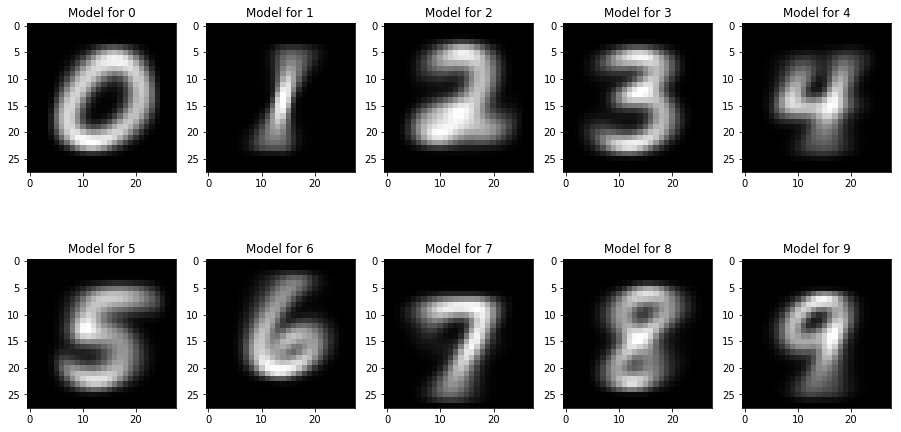

In [12]:
#Write code for visualising the lambdas estimated for each of the digits.
fig, axarr = plt.subplots(2,5)
plt.subplots_adjust(left=1, bottom=0, right=3, top=1.5, wspace=None, hspace=None)
k = 0
for i in range(2):
    for j in range(5):
        axarr[i,j].imshow(models[k].reshape(28,28),'gray')
        axarr[i,j].set_title("Model for "+str(k))
        k += 1